In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 5
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


# Deal with missing values done 

In [4]:
#Deal with missing values done 
#In your code, write comments justifying why you selected particular methods for dealing with missing values
#Answer: There is no missing values.
df.isnull().sum()

school    0
sex       0
         ..
G2        0
G3        0
Length: 33, dtype: int64

# Check for outliers

In [5]:
#Check for datatyes and convert to numerical values

idx= df.columns

for i in range(len(idx)):
    temp = idx[i]
    df[temp] = pd.to_numeric(df[temp], errors = 'coerce')
print(df.dtypes)

school    float64
sex       float64
           ...   
G2          int64
G3          int64
Length: 33, dtype: object


Check for outliers.  Do we keep them or do we drop them? Why? (explain with a few lines of comments or markdown in your code)

Answer: We keep the outliers because the outliers creates a significant association which impacts data analysis.

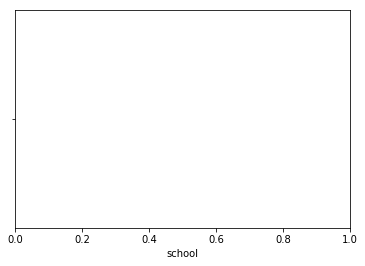

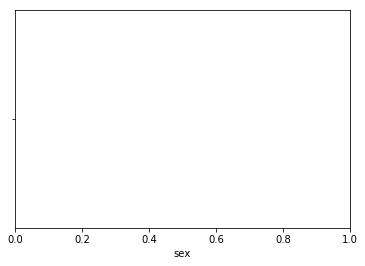

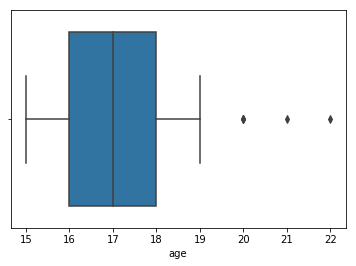

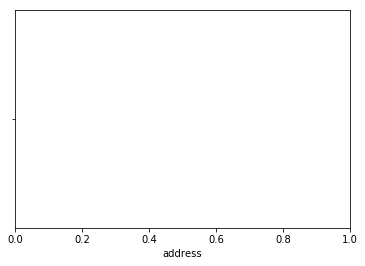

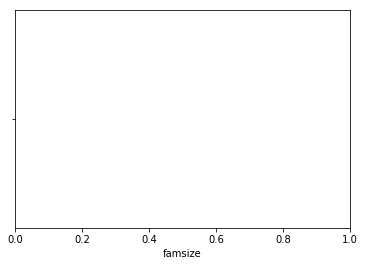

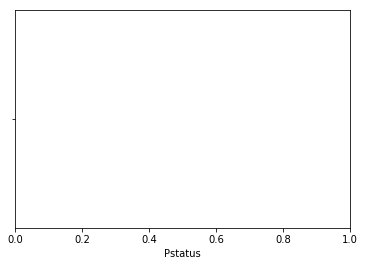

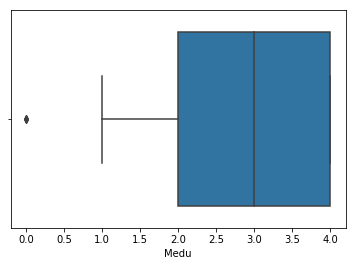

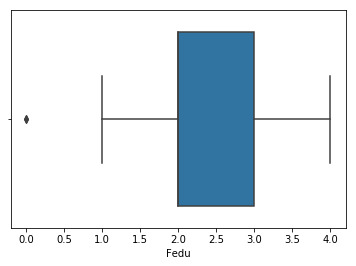

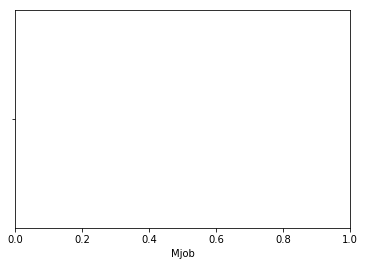

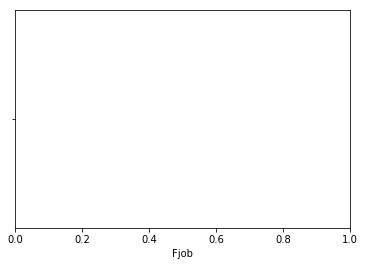

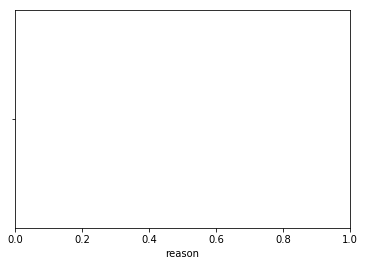

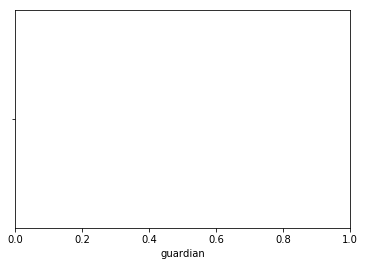

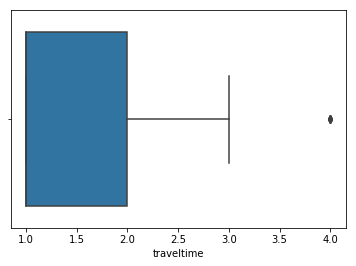

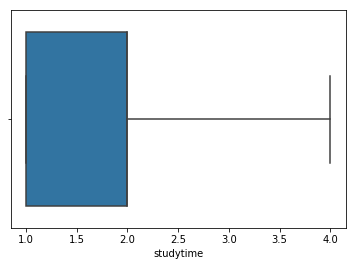

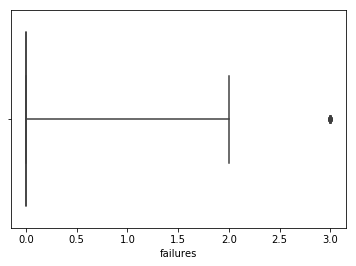

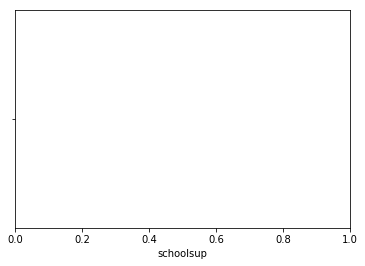

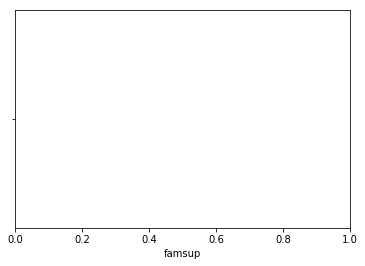

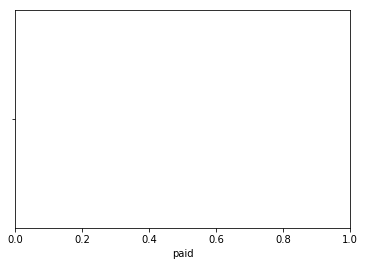

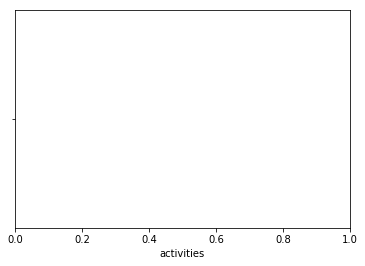

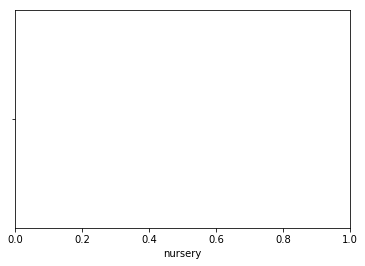

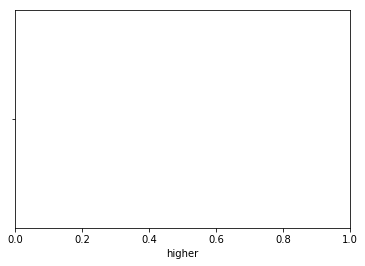

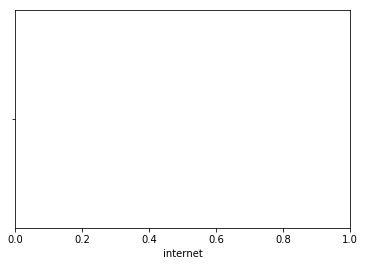

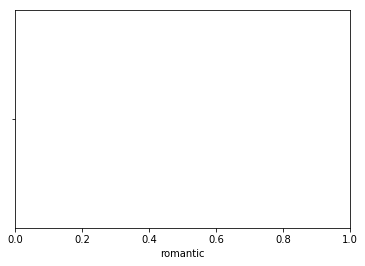

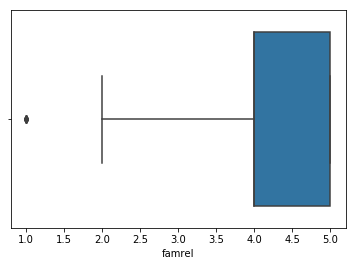

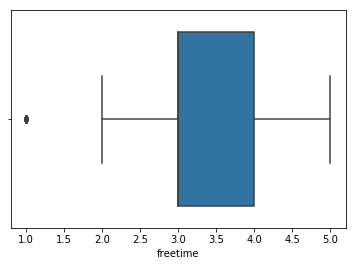

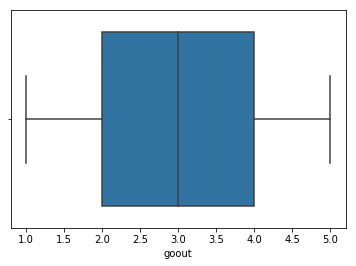

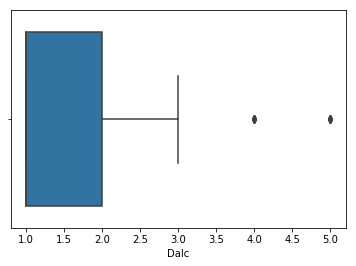

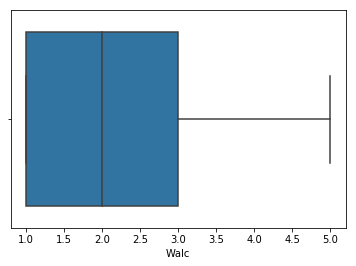

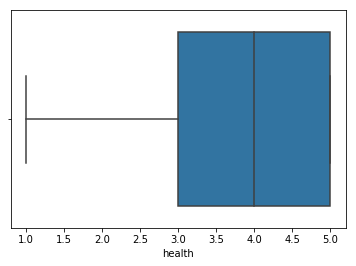

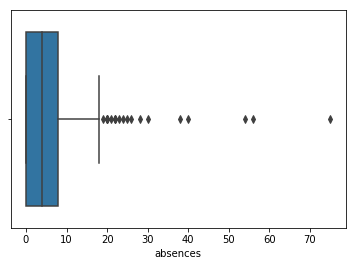

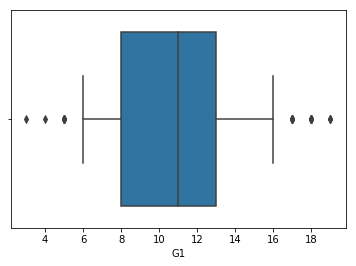

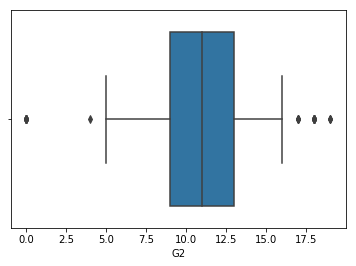

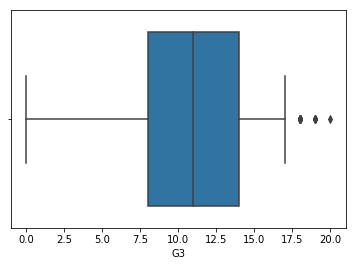

In [6]:
#Generate boxplots that demonstrate outliers
for i in range(len(idx)):
    temp = idx[i]
    sns.boxplot(x = df[temp], whis = [5, 95])
    plt.show()

# Center and scale data as needed

No center and scaling needed because histogram and distrubtions display are well centered and scalled. Ones that need to be center and scale have very high skews that worth representing. 

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


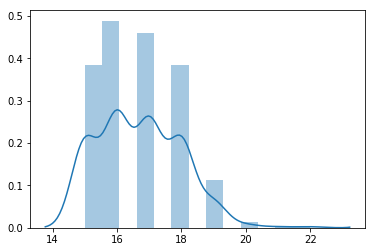

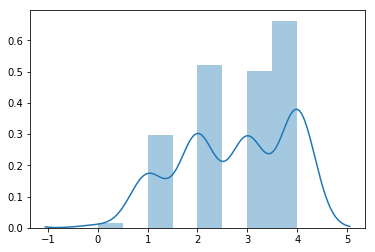

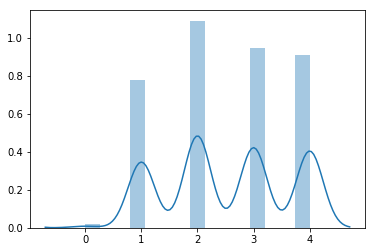

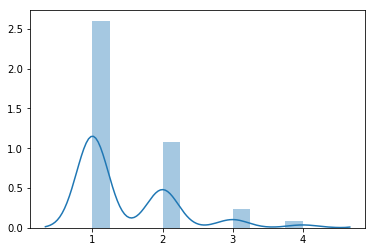

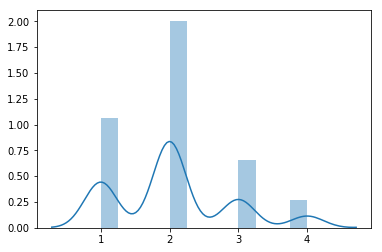

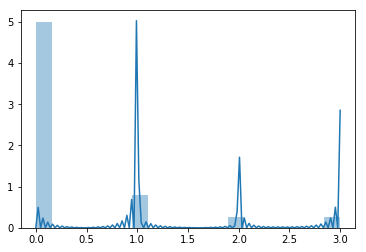

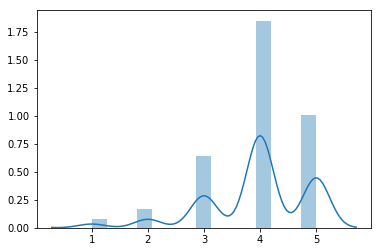

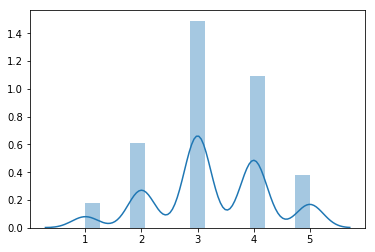

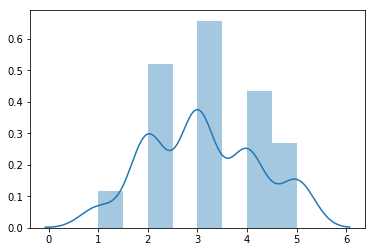

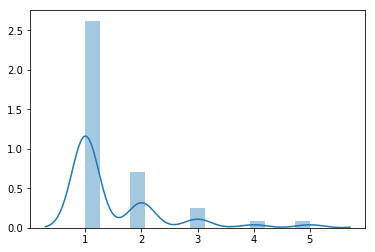

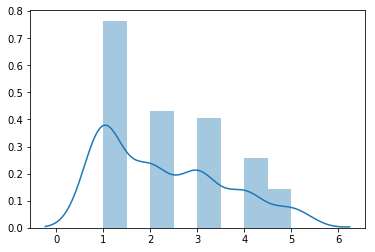

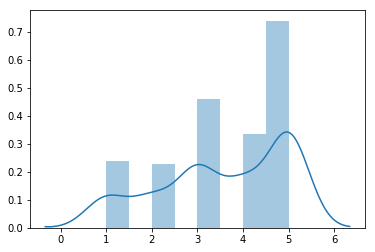

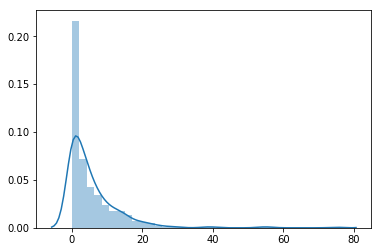

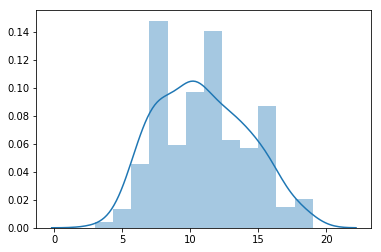

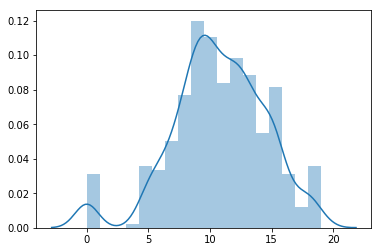

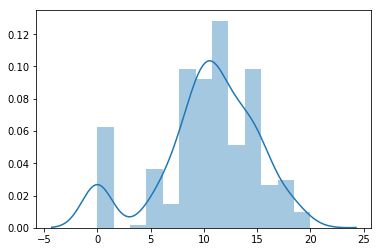

In [7]:
#Generate histograms with distrubtion curve for every field that contains continuous data
sns.distplot(df['age'].values)
plt.show()
sns.distplot(df['Medu'].values)
plt.show()
sns.distplot(df['Fedu'].values)
plt.show()
sns.distplot(df['traveltime'].values)
plt.show()
sns.distplot(df['studytime'].values)
plt.show()
sns.distplot(df['failures'].values)
plt.show()
sns.distplot(df['famrel'].values)
plt.show()
sns.distplot(df['freetime'].values)
plt.show()
sns.distplot(df['goout'].values)
plt.show()
sns.distplot(df['Dalc'].values)
plt.show()
sns.distplot(df['Walc'].values)
plt.show()
sns.distplot(df['health'].values)
plt.show()
sns.distplot(df['absences'].values)
plt.show()
sns.distplot(df['G1'].values)
plt.show()
sns.distplot(df['G2'].values)
plt.show()
sns.distplot(df['G3'].values)
plt.show()

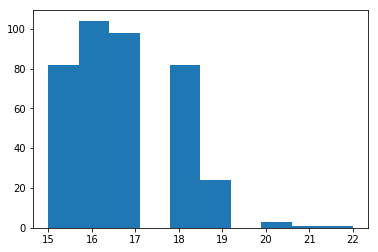

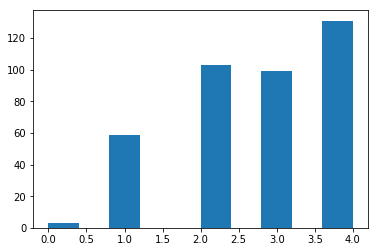

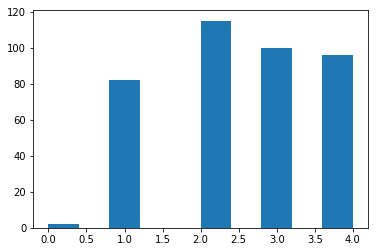

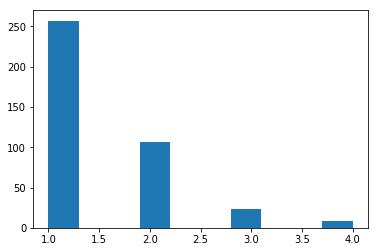

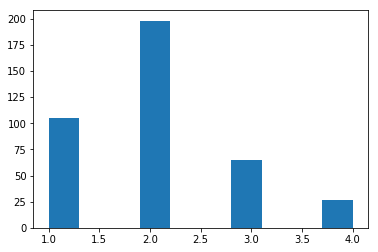

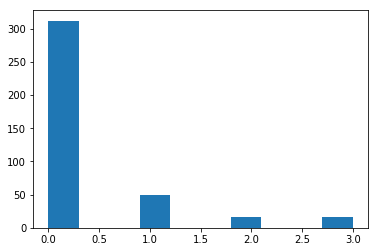

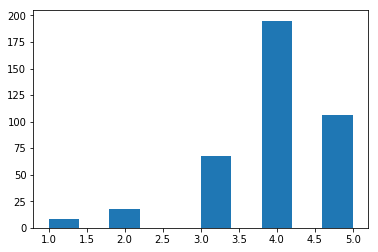

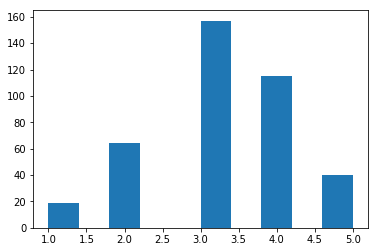

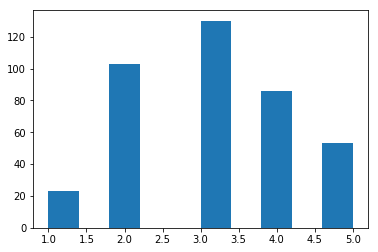

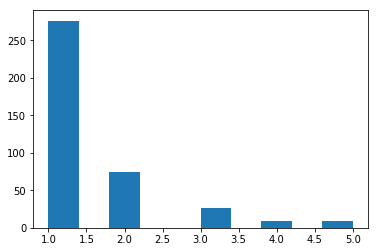

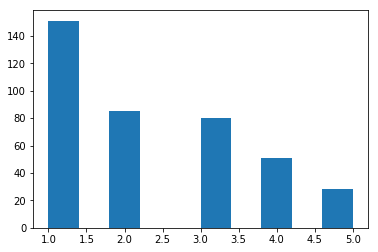

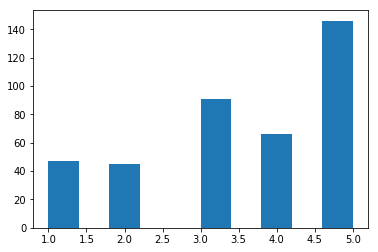

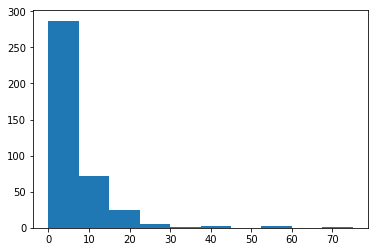

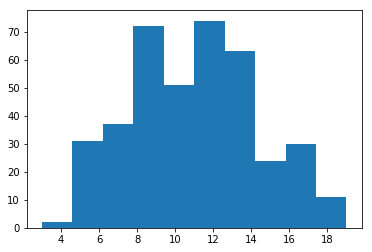

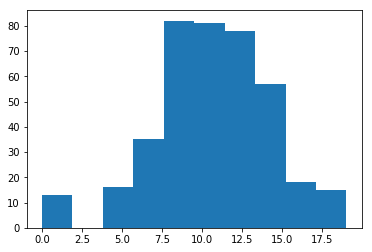

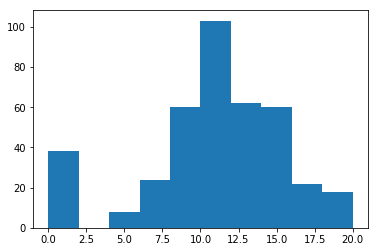

In [8]:
#Generate a histogram for every field that contains continuous data
plt.hist(df['age'].values)
plt.show()
plt.hist(df['Medu'].values)
plt.show()
plt.hist(df['Fedu'].values)
plt.show()
plt.hist(df['traveltime'].values)
plt.show()
plt.hist(df['studytime'].values)
plt.show()
plt.hist(df['failures'].values)
plt.show()
plt.hist(df['famrel'].values)
plt.show()
plt.hist(df['freetime'].values)
plt.show()
plt.hist(df['goout'].values)
plt.show()
plt.hist(df['Dalc'].values)
plt.show()
plt.hist(df['Walc'].values)
plt.show()
plt.hist(df['health'].values)
plt.show()
plt.hist(df['absences'].values)
plt.show()
plt.hist(df['G1'].values)
plt.show()
plt.hist(df['G2'].values)
plt.show()
plt.hist(df['G3'].values)
plt.show()

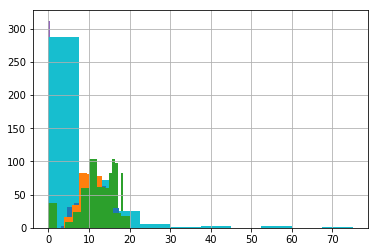

In [9]:
#Combined histograms of continous data
for i in range(len(idx)):
    temp = idx[i]
    df[temp].hist()

# Convert columns that contain discrete data to dummy variables

In [10]:
df = pd.read_csv('student-mat.csv', sep=';')

dummy = pd.get_dummies(df[list(df)])

In [11]:
dummy.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


# Linear Regression Model for Absences 

In [12]:
#Create and train a linear regression model that estimates the number of absences for a given student
dummy.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.377610,0.377610,0.028606,-0.028606,0.146722,-0.146722,-0.037847,0.037847,-0.029598,0.029598,0.088745,-0.082660,0.032488,-0.007732,-0.058256,0.082233,-0.109842,0.007682,0.042963,-0.069993,-0.003913,0.018283,0.027172,-0.031932,-0.112046,-0.133558,0.398396,0.251811,-0.251811,0.140609,-0.140609,0.035933,-0.035933,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.133333,-0.133333,-0.078228,0.078228,-0.138804,0.138804,0.043068,-0.043068,0.123565,-0.123565,-0.397637,0.251973,-0.235176,0.051764,0.454911,-0.073794,0.083398,-0.109887,-0.031834,0.259836,-0.094435,-0.008708,0.008229,0.106487,-0.046609,0.112375,-0.118635,0.036029,-0.036029,-0.183727,0.183727,-0.159700,0.159700,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
romantic_no,-0.164669,-0.039681,-0.015602,-0.021962,-0.053285,-0.093137,0.063816,0.011182,-0.007870,-0.015121,0.010141,-0.026342,-0.153384,0.037188,0.111774,0.129970,0.060700,-0.060700,-0.102023,0.102023,0.005257,-0.005257,0.034395,-0.034395,-0.040451,0.040451,-0.019326,-0.031343,-0.043476,0.041810,0.051288,-0.056706,0.000391,0.059505,-0.022762,-0.026933,0.049613,-0.030914,-0.074026,0.025374,0.039359,0.037525,-0.124045,-0.080716,0.080716,0.012440,-0.012440,0.005536,-0.005536,0.019651,-0.019651,0.027495,-0.027495,-0.105664,0.105664,0.087122,-0.087122,1.000000,-1.000000
romantic_yes,0.164669,0.039681,0.015602,0.021962,0.053285,0.093137,-0.063816,-0.011182,0.007870,0.015121,-0.010141,0.026342,0.153384,-0.037188,-0.111774,-0.129970,-0.060700,0.060700,0.102023,-0.102023,-0.005257,0.005257,-0.034395,0.034395,0.040451,-0.040451,0.019326,0.031343,0.043476,-0.041810,-0.051288,0.056706,-0.000391,-0.059505,0.022762,0.026933,-0.049613,0.030914,0.074026,-0.025374,-0.039359,-0.037525,0.124045,0.080716,-0.080716,-0.012440,0.012440,-0.005536,0.005536,-0.019651,0.019651,-0.027495,0.027495,0.105664,-0.105664,-0.087122,0.087122,-1.000000,1.000000


In [13]:
dummy.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [14]:
X = dummy[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

y = dummy[['absences']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2454875716307.6396


In [18]:
regression_model.score(X_test, y_test)

0.07205734569303412

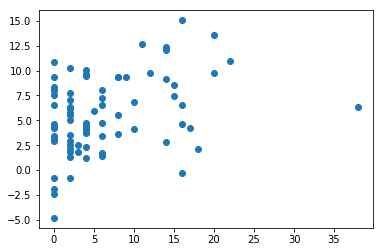

In [19]:
predictions = regression_model.predict(X_test)
plt.scatter(y_test,predictions)

In [20]:
print(predictions[0:5])

[[-2.44042969]
 [ 4.19580078]
 [15.04833984]
 [ 9.36181641]
 [ 3.38427734]]


# Evaluate Model's accuracy score and RSME score

In [21]:
y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

44.44073639338529

In [22]:
print("RSME:")
math.sqrt(regression_model_mse)

RSME:


6.666388557036358

In [23]:
confidence = regression_model.score(X_test, y_test)
print("Accuracy Score:", confidence)

Accuracy Score: 0.07205734569303412


Evaluate your model using the accuracy score and RSME score. Write a paragraph (either as comments or as markdown) explaining what those scores mean in the context of your problem 

Answer: The RSME is 6.666388557036358, which indicates how close the observed data values are to the model’s predicted values. The lower the RSME is the better fit. In this case, the RSME is high indicating that model's predicted values are not close to the observed data values. Accuracy score is 0.07205734569303412 or ~7% accuracy rate. This indicates that the data collected is bad or that adjustments need to be made to the datasets to normalize them (i.e. remove outliers).


# Play with Parameters

Play with parameters - will adding or removing parameters improve your model’s accuracy? Build models with three sets of parameters to compare the results. 

Inital Model
- RSME is 6.666388557036358
- Accuracy score is 0.07205734569303412 or ~7%


1) Remove 'Dalc', 'Walc'
- Accuracy Score: 0.15847466583944203
- RSME1: 6.348390772679846
- Removing these two parameters slightly increase accuracy and best fit compared to the inital model and two other varied parameter models. 

2) Remove 'famrel', 'address_R', 'goout', 'romantic_no', 'romantic_yes', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'guardian_father','guardian_mother', 'guardian_other','Fjob_services', 'Dalc', 'Walc'
- Accuracy Score: 0.11844654143004818
- RSME2: 6.497621079208492
- Removing these parameters slightly increase accuracy and best fit compared to the inital model and the third varied parameter model, but not the first varied parameter model. 
           
3) Remove 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2','G3', 'school_GP', 'school_MS', 'reason_other', 'reason_reputation', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation'
- Accuracy Score: -0.0541887906720524
- RSME3: 7.105411773117627
- Removing these parameters greatly decreased accuracy and best fit compared to the inital model and two other varied parameter models. 

# 1) Remove 'Dalc', 'Walc'

In [24]:
df1 = pd.read_csv('student-mat.csv', sep=';')

dummy1 = pd.get_dummies(df1[list(df1)])

In [25]:
dummy1.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.377610,0.377610,0.028606,-0.028606,0.146722,-0.146722,-0.037847,0.037847,-0.029598,0.029598,0.088745,-0.082660,0.032488,-0.007732,-0.058256,0.082233,-0.109842,0.007682,0.042963,-0.069993,-0.003913,0.018283,0.027172,-0.031932,-0.112046,-0.133558,0.398396,0.251811,-0.251811,0.140609,-0.140609,0.035933,-0.035933,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.133333,-0.133333,-0.078228,0.078228,-0.138804,0.138804,0.043068,-0.043068,0.123565,-0.123565,-0.397637,0.251973,-0.235176,0.051764,0.454911,-0.073794,0.083398,-0.109887,-0.031834,0.259836,-0.094435,-0.008708,0.008229,0.106487,-0.046609,0.112375,-0.118635,0.036029,-0.036029,-0.183727,0.183727,-0.159700,0.159700,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
romantic_no,-0.164669,-0.039681,-0.015602,-0.021962,-0.053285,-0.093137,0.063816,0.011182,-0.007870,-0.015121,0.010141,-0.026342,-0.153384,0.037188,0.111774,0.129970,0.060700,-0.060700,-0.102023,0.102023,0.005257,-0.005257,0.034395,-0.034395,-0.040451,0.040451,-0.019326,-0.031343,-0.043476,0.041810,0.051288,-0.056706,0.000391,0.059505,-0.022762,-0.026933,0.049613,-0.030914,-0.074026,0.025374,0.039359,0.037525,-0.124045,-0.080716,0.080716,0.012440,-0.012440,0.005536,-0.005536,0.019651,-0.019651,0.027495,-0.027495,-0.105664,0.105664,0.087122,-0.087122,1.000000,-1.000000
romantic_yes,0.164669,0.039681,0.015602,0.021962,0.053285,0.093137,-0.063816,-0.011182,0.007870,0.015121,-0.010141,0.026342,0.153384,-0.037188,-0.111774,-0.129970,-0.060700,0.060700,0.102023,-0.102023,-0.005257,0.005257,-0.034395,0.034395,0.040451,-0.040451,0.019326,0.031343,0.043476,-0.041810,-0.051288,0.056706,-0.000391,-0.059505,0.022762,0.026933,-0.049613,0.030914,0.074026,-0.025374,-0.039359,-0.037525,0.124045,0.080716,-0.080716,-0.012440,0.012440,-0.005536,0.005536,-0.019651,0.019651,-0.027495,0.027495,0.105664,-0.105664,-0.087122,0.087122,-1.000000,1.000000


In [26]:
X1 = dummy1[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

y1 = dummy1[['absences']]

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)

In [28]:
regression_model1 = LinearRegression()
regression_model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
regression_model1.score(X1_test, y1_test)

0.15847466583944203

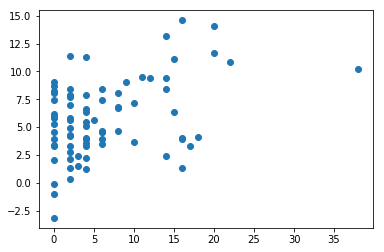

In [30]:
predictions1 = regression_model1.predict(X1_test)
plt.scatter(y1_test,predictions1)

In [33]:
y1_predict = regression_model1.predict(X1_test)

regression_model_mse1 = mean_squared_error(y1_predict, y1_test)

regression_model_mse1

40.302065402646605

In [34]:
print("RSME1:")
math.sqrt(regression_model_mse1)

RSME1:


6.348390772679846

# 2) Remove 'famrel', 'address_R', 'goout', 'romantic_no', 'romantic_yes', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'guardian_father','guardian_mother', 'guardian_other','Fjob_services', 'Dalc', 'Walc'

In [35]:
df2 = pd.read_csv('student-mat.csv', sep=';')

In [36]:
dummy2 = pd.get_dummies(df2[list(df2)])

In [37]:
dummy2.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.377610,0.377610,0.028606,-0.028606,0.146722,-0.146722,-0.037847,0.037847,-0.029598,0.029598,0.088745,-0.082660,0.032488,-0.007732,-0.058256,0.082233,-0.109842,0.007682,0.042963,-0.069993,-0.003913,0.018283,0.027172,-0.031932,-0.112046,-0.133558,0.398396,0.251811,-0.251811,0.140609,-0.140609,0.035933,-0.035933,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.133333,-0.133333,-0.078228,0.078228,-0.138804,0.138804,0.043068,-0.043068,0.123565,-0.123565,-0.397637,0.251973,-0.235176,0.051764,0.454911,-0.073794,0.083398,-0.109887,-0.031834,0.259836,-0.094435,-0.008708,0.008229,0.106487,-0.046609,0.112375,-0.118635,0.036029,-0.036029,-0.183727,0.183727,-0.159700,0.159700,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
romantic_no,-0.164669,-0.039681,-0.015602,-0.021962,-0.053285,-0.093137,0.063816,0.011182,-0.007870,-0.015121,0.010141,-0.026342,-0.153384,0.037188,0.111774,0.129970,0.060700,-0.060700,-0.102023,0.102023,0.005257,-0.005257,0.034395,-0.034395,-0.040451,0.040451,-0.019326,-0.031343,-0.043476,0.041810,0.051288,-0.056706,0.000391,0.059505,-0.022762,-0.026933,0.049613,-0.030914,-0.074026,0.025374,0.039359,0.037525,-0.124045,-0.080716,0.080716,0.012440,-0.012440,0.005536,-0.005536,0.019651,-0.019651,0.027495,-0.027495,-0.105664,0.105664,0.087122,-0.087122,1.000000,-1.000000
romantic_yes,0.164669,0.039681,0.015602,0.021962,0.053285,0.093137,-0.063816,-0.011182,0.007870,0.015121,-0.010141,0.026342,0.153384,-0.037188,-0.111774,-0.129970,-0.060700,0.060700,0.102023,-0.102023,-0.005257,0.005257,-0.034395,0.034395,0.040451,-0.040451,0.019326,0.031343,0.043476,-0.041810,-0.051288,0.056706,-0.000391,-0.059505,0.022762,0.026933,-0.049613,0.030914,0.074026,-0.025374,-0.039359,-0.037525,0.124045,0.080716,-0.080716,-0.012440,0.012440,-0.005536,0.005536,-0.019651,0.019651,-0.027495,0.027495,0.105664,-0.105664,-0.087122,0.087122,-1.000000,1.000000


In [38]:
X2 = dummy2[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'freetime', 'health', 'G1', 'G2','G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 
        'reason_other', 'reason_reputation', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no','Fjob_teacher', 'reason_course', 'reason_home', 
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes']]

y2 = dummy2[['absences']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=1)

In [39]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
regression_model2.score(X_test2, y_test2)

0.11844654143004818

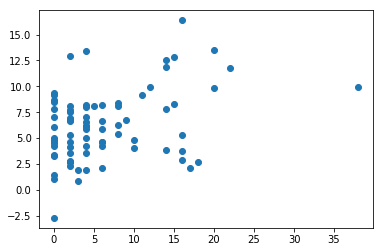

In [41]:
predictions2 = regression_model2.predict(X_test2)
plt.scatter(y_test2,predictions2)

In [42]:
y_predict2 = regression_model2.predict(X_test2)

regression_model_mse2 = mean_squared_error(y_predict2, y_test2)

regression_model_mse2

42.219079688974524

In [43]:
print("RSME2:")
math.sqrt(regression_model_mse2)

RSME2:


6.497621079208492

# 3) Remove 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2','G3', 'school_GP', 'school_MS', 'reason_other', 'reason_reputation', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation',

In [44]:
df3 = pd.read_csv('student-mat.csv', sep=';')
dummy3 = pd.get_dummies(df3[list(df3)])

In [45]:
dummy3.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.377610,0.377610,0.028606,-0.028606,0.146722,-0.146722,-0.037847,0.037847,-0.029598,0.029598,0.088745,-0.082660,0.032488,-0.007732,-0.058256,0.082233,-0.109842,0.007682,0.042963,-0.069993,-0.003913,0.018283,0.027172,-0.031932,-0.112046,-0.133558,0.398396,0.251811,-0.251811,0.140609,-0.140609,0.035933,-0.035933,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.133333,-0.133333,-0.078228,0.078228,-0.138804,0.138804,0.043068,-0.043068,0.123565,-0.123565,-0.397637,0.251973,-0.235176,0.051764,0.454911,-0.073794,0.083398,-0.109887,-0.031834,0.259836,-0.094435,-0.008708,0.008229,0.106487,-0.046609,0.112375,-0.118635,0.036029,-0.036029,-0.183727,0.183727,-0.159700,0.159700,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
romantic_no,-0.164669,-0.039681,-0.015602,-0.021962,-0.053285,-0.093137,0.063816,0.011182,-0.007870,-0.015121,0.010141,-0.026342,-0.153384,0.037188,0.111774,0.129970,0.060700,-0.060700,-0.102023,0.102023,0.005257,-0.005257,0.034395,-0.034395,-0.040451,0.040451,-0.019326,-0.031343,-0.043476,0.041810,0.051288,-0.056706,0.000391,0.059505,-0.022762,-0.026933,0.049613,-0.030914,-0.074026,0.025374,0.039359,0.037525,-0.124045,-0.080716,0.080716,0.012440,-0.012440,0.005536,-0.005536,0.019651,-0.019651,0.027495,-0.027495,-0.105664,0.105664,0.087122,-0.087122,1.000000,-1.000000
romantic_yes,0.164669,0.039681,0.015602,0.021962,0.053285,0.093137,-0.063816,-0.011182,0.007870,0.015121,-0.010141,0.026342,0.153384,-0.037188,-0.111774,-0.129970,-0.060700,0.060700,0.102023,-0.102023,-0.005257,0.005257,-0.034395,0.034395,0.040451,-0.040451,0.019326,0.031343,0.043476,-0.041810,-0.051288,0.056706,-0.000391,-0.059505,0.022762,0.026933,-0.049613,0.030914,0.074026,-0.025374,-0.039359,-0.037525,0.124045,0.080716,-0.080716,-0.012440,0.012440,-0.005536,0.005536,-0.019651,0.019651,-0.027495,0.027495,0.105664,-0.105664,-0.087122,0.087122,-1.000000,1.000000


In [46]:
X3 = dummy3[['age', 'famrel', 'freetime', 'goout', 'health', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'guardian_father','guardian_mother', 'guardian_other','internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'Dalc', 'Walc']]

y3 = dummy3[['absences']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=1)

In [47]:
regression_model3 = LinearRegression()
regression_model3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
regression_model3.score(X_test3, y_test3)

-0.0541887906720524

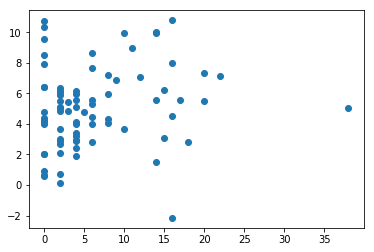

In [49]:
predictions3 = regression_model3.predict(X_test3)
plt.scatter(y_test3,predictions3)

In [50]:
y_predict3 = regression_model3.predict(X_test3)

regression_model_mse3 = mean_squared_error(y_predict3, y_test3)

regression_model_mse3

50.486876465558574

In [51]:
print("RSME3:")
math.sqrt(regression_model_mse3)

RSME3:


7.105411773117627

# BEST Model is “Good” or Not 

Write a paragraph (either as comments or as markdown) explaining whether or not your BEST model is “good” and why



The BEST model is not good because the RSME is 6.666388557036358 and the accuracy score is 0.07205734569303412 or ~7% accuracy rate. So, model's ability to predict data values against observed values is not accurate nor precise. This is demonstrated by "print(predictions[0:5])" as predicted values wildly varied. Therefore, one can conclude that the data collected is bad or that adjustments need to be made to the datasets to normalize them (i.e. remove outliers).